In [1]:
import pandas as pd
import numpy as np
import uuid, itertools

# Gorilla assessment

### 1. Use pandas to calculate a Transportation Distribution Charge for 3 Gas meters in the United Kingdom. Save your code in a Jupyter Notebook and upload to a public repo on Github (or any other platform of your choice). All calculations must be done using vectorized operations. 


* Calculate the **total cost per meter** by summing the costs per day for the full period of the forecast (2020-10-01 to 2022-09-30) and converting to £ (1p = 0.01£)

* Calculate the **total consumption** by summing the forecasted consumption for the full period.

Your result should be a dataframe of the following form with all numerical rounded values up to 2 decimals:


In [2]:
xlsx = pd.ExcelFile('data.xlsx', engine='openpyxl')
xlsx.sheet_names

['Forecasted Consumption', 'Meter List', 'Rates']

In [3]:
df_forecasted_consumption = pd.read_excel(xlsx, 'Forecasted Consumption')
df_meter_list = pd.read_excel(xlsx, 'Meter List')
df_rates = pd.read_excel(xlsx, 'Rates')

From the EDA, we have learned that the AQ (max) has null values which we should set to inifity values.

In [4]:
# set the nan values to infitity
df_rates['Annual Quantity (Max)'] = df_rates['Annual Quantity (Max)'].fillna(np.inf)

Note, I am assuming that 'Annual Quantity (kWh)' is the value that is used to determine the rate.

In [5]:
df_exit_zones = pd.merge(df_rates, df_meter_list, on="Exit Zone")
min_range = (df_exit_zones['Annual Quantity (Min)'] <= df_exit_zones['Annual Quantity (kWh)'])
max_range = (df_exit_zones['Annual Quantity (Max)'] > df_exit_zones['Annual Quantity (kWh)'])
df_lookup_rates = df_exit_zones.loc[min_range & max_range]
df_lookup_rates

Date Exit Zone  Annual Quantity (Min)  Annual Quantity (Max)  \
1  2020-04-01       EM2                  73200               732000.0   
4  2020-10-01       EM2                  73200               732000.0   
7  2021-04-01       EM2                  73200               732000.0   
10 2021-10-01       EM2                  73200               732000.0   
13 2022-04-01       EM2                  73200               732000.0   
16 2022-10-01       EM2                  73200               732000.0   
19 2023-04-01       EM2                  73200               732000.0   
22 2023-10-01       EM2                  73200               732000.0   
25 2024-04-01       EM2                  73200               732000.0   
28 2020-04-01       NW1                  73200               732000.0   
31 2020-10-01       NW1                  73200               732000.0   
34 2021-04-01       NW1                  73200               732000.0   
37 2021-10-01       NW1                  73200               732000.0   
40 2022-04-01       NW1                  73200               732000.0   
43 2022-10-01       NW1                  73200               732000.0   
46 2023-04-01       NW1                  73200               732000.0   
49 2023-10-01       NW1                  73200               732000.0   
52 2024-04-01       NW1                  73200               732000.0   
54 2020-04-01       SC1                      0                73200.0   
57 2020-10-01       SC1                      0                73200.0   
60 2021-04-01       SC1                      0                73200.0   
63 2021-10-01       SC1                      0                73200.0   
66 2022-04-01       SC1                      0                73200.0   
69 2022-10-01       SC1                      0                73200.0   
72 2023-04-01       SC1                      0                73200.0   
75 2023-10-01       SC1                      0                73200.0   
78 2024-04-01       SC1                      0                73200.0   

    Rate (p/kWh)    Meter ID  Annual Quantity (kWh)  
1       0.022800    10588707                  75123  
4       0.022800    10588707                  75123  
7       0.023360    10588707                  75123  
10      0.023360    10588707                  75123  
13      0.024358    10588707                  75123  
16      0.024358    10588707                  75123  
19      0.025147    10588707                  75123  
22      0.025147    10588707                  75123  
25      0.025962    10588707                  75123  
28      0.028500    10626610                 151779  
31      0.028500    10626610                 151779  
34      0.029075    10626610                 151779  
37      0.029075    10626610                 151779  
40      0.030284    10626610                 151779  
43      0.030284    10626610                 151779  
46      0.031236    10626610                 151779  
49      0.031236    10626610                 151779  
52      0.032216    10626610                 151779  
54      0.033300  1000000603                  12337  
57      0.033300  1000000603                  12337  
60      0.033313  1000000603                  12337  
63      0.033313  1000000603                  12337  
66      0.034706  1000000603                  12337  
69      0.034706  1000000603                  12337  
72      0.035836  1000000603                  12337  
75      0.035836  1000000603                  12337  
78      0.036988  1000000603                  12337

In [6]:
df_lookup_rates['Date_end'] = df_lookup_rates['Date'].shift(-1)
df_lookup_rates

/Users/nielshellinga/Documents/Projecten/SimplonSolutions/gorilla.co/gorilla test/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date Exit Zone  Annual Quantity (Min)  Annual Quantity (Max)  \
1  2020-04-01       EM2                  73200               732000.0   
4  2020-10-01       EM2                  73200               732000.0   
7  2021-04-01       EM2                  73200               732000.0   
10 2021-10-01       EM2                  73200               732000.0   
13 2022-04-01       EM2                  73200               732000.0   
16 2022-10-01       EM2                  73200               732000.0   
19 2023-04-01       EM2                  73200               732000.0   
22 2023-10-01       EM2                  73200               732000.0   
25 2024-04-01       EM2                  73200               732000.0   
28 2020-04-01       NW1                  73200               732000.0   
31 2020-10-01       NW1                  73200               732000.0   
34 2021-04-01       NW1                  73200               732000.0   
37 2021-10-01       NW1                  73200               732000.0   
40 2022-04-01       NW1                  73200               732000.0   
43 2022-10-01       NW1                  73200               732000.0   
46 2023-04-01       NW1                  73200               732000.0   
49 2023-10-01       NW1                  73200               732000.0   
52 2024-04-01       NW1                  73200               732000.0   
54 2020-04-01       SC1                      0                73200.0   
57 2020-10-01       SC1                      0                73200.0   
60 2021-04-01       SC1                      0                73200.0   
63 2021-10-01       SC1                      0                73200.0   
66 2022-04-01       SC1                      0                73200.0   
69 2022-10-01       SC1                      0                73200.0   
72 2023-04-01       SC1                      0                73200.0   
75 2023-10-01       SC1                      0                73200.0   
78 2024-04-01       SC1                      0                73200.0   

    Rate (p/kWh)    Meter ID  Annual Quantity (kWh)   Date_end  
1       0.022800    10588707                  75123 2020-10-01  
4       0.022800    10588707                  75123 2021-04-01  
7       0.023360    10588707                  75123 2021-10-01  
10      0.023360    10588707                  75123 2022-04-01  
13      0.024358    10588707                  75123 2022-10-01  
16      0.024358    10588707                  75123 2023-04-01  
19      0.025147    10588707                  75123 2023-10-01  
22      0.025147    10588707                  75123 2024-04-01  
25      0.025962    10588707                  75123 2020-04-01  
28      0.028500    10626610                 151779 2020-10-01  
31      0.028500    10626610                 151779 2021-04-01  
34      0.029075    10626610                 151779 2021-10-01  
37      0.029075    10626610                 151779 2022-04-01  
40      0.030284    10626610                 151779 2022-10-01  
43      0.030284    10626610                 151779 2023-04-01  
46      0.031236    10626610                 151779 2023-10-01  
49      0.031236    10626610                 151779 2024-04-01  
52      0.032216    10626610                 151779 2020-04-01  
54      0.033300  1000000603                  12337 2020-10-01  
57      0.033300  1000000603                  12337 2021-04-01  
60      0.033313  1000000603                  12337 2021-10-01  
63      0.033313  1000000603                  12337 2022-04-01  
66      0.034706  1000000603                  12337 2022-10-01  
69      0.034706  1000000603                  12337 2023-04-01  
72      0.035836  1000000603                  12337 2023-10-01  
75      0.035836  1000000603                  12337 2024-04-01  
78      0.036988  1000000603                  12337        NaT

In [7]:
df_lookup_rates['consumption (kWh) over period'] = df_lookup_rates.apply(lambda x: df_forecasted_consumption.loc[
    (df_forecasted_consumption['Meter ID'] == x['Meter ID']) &
    (df_forecasted_consumption['Date'] >= x['Date']) &
    (df_forecasted_consumption['Date'] < x['Date_end'])
]['kWh'].sum(), axis=1)

df_lookup_rates

/Users/nielshellinga/Documents/Projecten/SimplonSolutions/gorilla.co/gorilla test/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Date Exit Zone  Annual Quantity (Min)  Annual Quantity (Max)  \
1  2020-04-01       EM2                  73200               732000.0   
4  2020-10-01       EM2                  73200               732000.0   
7  2021-04-01       EM2                  73200               732000.0   
10 2021-10-01       EM2                  73200               732000.0   
13 2022-04-01       EM2                  73200               732000.0   
16 2022-10-01       EM2                  73200               732000.0   
19 2023-04-01       EM2                  73200               732000.0   
22 2023-10-01       EM2                  73200               732000.0   
25 2024-04-01       EM2                  73200               732000.0   
28 2020-04-01       NW1                  73200               732000.0   
31 2020-10-01       NW1                  73200               732000.0   
34 2021-04-01       NW1                  73200               732000.0   
37 2021-10-01       NW1                  73200               732000.0   
40 2022-04-01       NW1                  73200               732000.0   
43 2022-10-01       NW1                  73200               732000.0   
46 2023-04-01       NW1                  73200               732000.0   
49 2023-10-01       NW1                  73200               732000.0   
52 2024-04-01       NW1                  73200               732000.0   
54 2020-04-01       SC1                      0                73200.0   
57 2020-10-01       SC1                      0                73200.0   
60 2021-04-01       SC1                      0                73200.0   
63 2021-10-01       SC1                      0                73200.0   
66 2022-04-01       SC1                      0                73200.0   
69 2022-10-01       SC1                      0                73200.0   
72 2023-04-01       SC1                      0                73200.0   
75 2023-10-01       SC1                      0                73200.0   
78 2024-04-01       SC1                      0                73200.0   

    Rate (p/kWh)    Meter ID  Annual Quantity (kWh)   Date_end  \
1       0.022800    10588707                  75123 2020-10-01   
4       0.022800    10588707                  75123 2021-04-01   
7       0.023360    10588707                  75123 2021-10-01   
10      0.023360    10588707                  75123 2022-04-01   
13      0.024358    10588707                  75123 2022-10-01   
16      0.024358    10588707                  75123 2023-04-01   
19      0.025147    10588707                  75123 2023-10-01   
22      0.025147    10588707                  75123 2024-04-01   
25      0.025962    10588707                  75123 2020-04-01   
28      0.028500    10626610                 151779 2020-10-01   
31      0.028500    10626610                 151779 2021-04-01   
34      0.029075    10626610                 151779 2021-10-01   
37      0.029075    10626610                 151779 2022-04-01   
40      0.030284    10626610                 151779 2022-10-01   
43      0.030284    10626610                 151779 2023-04-01   
46      0.031236    10626610                 151779 2023-10-01   
49      0.031236    10626610                 151779 2024-04-01   
52      0.032216    10626610                 151779 2020-04-01   
54      0.033300  1000000603                  12337 2020-10-01   
57      0.033300  1000000603                  12337 2021-04-01   
60      0.033313  1000000603                  12337 2021-10-01   
63      0.033313  1000000603                  12337 2022-04-01   
66      0.034706  1000000603                  12337 2022-10-01   
69      0.034706  1000000603                  12337 2023-04-01   
72      0.035836  1000000603                  12337 2023-10-01   
75      0.035836  1000000603                  12337 2024-04-01   
78      0.036988  1000000603                  12337        NaT   

    consumption (kWh) over period  
1                        0.000000  
4                    46488.112978  
7      

In [8]:
df_lookup_rates['cost over period (£)'] = df_lookup_rates['Rate (p/kWh)'] * df_lookup_rates['consumption (kWh) over period'] / 100
df_lookup_rates

/Users/nielshellinga/Documents/Projecten/SimplonSolutions/gorilla.co/gorilla test/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date Exit Zone  Annual Quantity (Min)  Annual Quantity (Max)  \
1  2020-04-01       EM2                  73200               732000.0   
4  2020-10-01       EM2                  73200               732000.0   
7  2021-04-01       EM2                  73200               732000.0   
10 2021-10-01       EM2                  73200               732000.0   
13 2022-04-01       EM2                  73200               732000.0   
16 2022-10-01       EM2                  73200               732000.0   
19 2023-04-01       EM2                  73200               732000.0   
22 2023-10-01       EM2                  73200               732000.0   
25 2024-04-01       EM2                  73200               732000.0   
28 2020-04-01       NW1                  73200               732000.0   
31 2020-10-01       NW1                  73200               732000.0   
34 2021-04-01       NW1                  73200               732000.0   
37 2021-10-01       NW1                  73200               732000.0   
40 2022-04-01       NW1                  73200               732000.0   
43 2022-10-01       NW1                  73200               732000.0   
46 2023-04-01       NW1                  73200               732000.0   
49 2023-10-01       NW1                  73200               732000.0   
52 2024-04-01       NW1                  73200               732000.0   
54 2020-04-01       SC1                      0                73200.0   
57 2020-10-01       SC1                      0                73200.0   
60 2021-04-01       SC1                      0                73200.0   
63 2021-10-01       SC1                      0                73200.0   
66 2022-04-01       SC1                      0                73200.0   
69 2022-10-01       SC1                      0                73200.0   
72 2023-04-01       SC1                      0                73200.0   
75 2023-10-01       SC1                      0                73200.0   
78 2024-04-01       SC1                      0                73200.0   

    Rate (p/kWh)    Meter ID  Annual Quantity (kWh)   Date_end  \
1       0.022800    10588707                  75123 2020-10-01   
4       0.022800    10588707                  75123 2021-04-01   
7       0.023360    10588707                  75123 2021-10-01   
10      0.023360    10588707                  75123 2022-04-01   
13      0.024358    10588707                  75123 2022-10-01   
16      0.024358    10588707                  75123 2023-04-01   
19      0.025147    10588707                  75123 2023-10-01   
22      0.025147    10588707                  75123 2024-04-01   
25      0.025962    10588707                  75123 2020-04-01   
28      0.028500    10626610                 151779 2020-10-01   
31      0.028500    10626610                 151779 2021-04-01   
34      0.029075    10626610                 151779 2021-10-01   
37      0.029075    10626610                 151779 2022-04-01   
40      0.030284    10626610                 151779 2022-10-01   
43      0.030284    10626610                 151779 2023-04-01   
46      0.031236    10626610                 151779 2023-10-01   
49      0.031236    10626610                 151779 2024-04-01   
52      0.032216    10626610                 151779 2020-04-01   
54      0.033300  1000000603                  12337 2020-10-01   
57      0.033300  1000000603                  12337 2021-04-01   
60      0.033313  1000000603                  12337 2021-10-01   
63      0.033313  1000000603                  12337 2022-04-01   
66      0.034706  1000000603                  12337 2022-10-01   
69      0.034706  1000000603                  12337 2023-04-01   
72      0.035836  1000000603                  12337 2023-10-01   
75      0.035836  1000000603                  12337 2024-04-01   
78      0.036988  1000000603                  12337        NaT   

    consumption (kWh) over period  cost over period (£)  
1                        0.000000              0.000000  

In [9]:
df = df_lookup_rates.groupby('Meter ID')[['consumption (kWh) over period','cost over period (£)']].sum()
df = df.rename(columns={'consumption (kWh) over period': 'Total Estimated Consumption (kWh)', 'cost over period (£)':'Total Cost (£)'})
df = df.round(2)
df

Total Estimated Consumption (kWh)  Total Cost (£)
Meter ID                                                     
10588707                             122450.0           28.50
10626610                             303558.0           88.24
1000000603                            24674.0            8.27

### 2. Write a function that generates a list of random meters of any size. Examples of valid Exit Zones can be found in the rate table. You may randomly generate the Annual Quantity.

In [10]:
# get all unique and valid exit zones
unique_exit_zones = np.array(df_rates['Exit Zone'].unique())

In [11]:
def uniqueId():
    """Returns a unique id
    :rtype: int
    :return: id
    """
    while True:
        yield uuid.uuid1().int

def uniformRandomExitZone():
    """Returns an Exit Zone
    :rtype: string
    :return: valid Exit Zone
    """
    while True:
        index = np.random.randint(0, len(unique_exit_zones)-1)
        yield unique_exit_zones[index]

def randomlyGenerateAnnualQuantity():
    """Returns a random generated 'Annual Quantity (kWh)' range between 0 to 1'000'000
    :rtype: int
    :return: 'Annual Quantity (kWh)'
    """
    # note, there are three regions. What is the Max possible number? For now 1'000'000 !
    # 1.       0   -    73'199
    # 2.  73'200   -   731'999
    # 3. 732'000   -       inf
    while True:
        yield np.random.randint(0, 1000000)

In [12]:
def generateMeterList(size): 
    """ Return a list of random meters of any given size 
    :params size: the size of the Meter list
    :type size: int

    :raises ValueError: if size is <= to 0

    :rtype: list
    :return: list (of length 'size') containing ['Meter ID', 'Exit Zone', 'Annual Quantity (kWh)']
    """

    if size <= 0:
        raise ValueError('size must be > 0')

    meter_id        = list(itertools.islice(uniqueId(), size))
    exit_zone       = list(itertools.islice(uniformRandomExitZone(), size))
    annual_quantity = list(itertools.islice(randomlyGenerateAnnualQuantity(), size))
    return np.stack([meter_id, exit_zone, annual_quantity], axis=1)

Note, for 'randomlyGenerateAnnualQuantity()', we currently use a random uniform distribution between 0 - 1 million. We should use some other distrubution based on the rates ranges (Min-Max) to make sure we do not get a bias (mock) dataset in one range. The distrubution should be based on 'real' estimates given by the client.

In [13]:
# demo with size 5
mock_meter_list = generateMeterList(5)
mock_meter_list

array([[186120838041681634226262361806177747893, 'SO1', 805884],
       [186146711741170242559635491281485087669, 'EA3', 851521],
       [186146799525974308366874112783529722805, 'NT1', 431232],
       [186146810776373385389980640542780998581, 'SC1', 56127],
       [186146818699189636819449263096070325173, 'EA1', 84582]],
      dtype=object)

### 3. Write a function that generates mock consumption data given a list of meters and a start and end date.

As we have seen in the EDA, we can create a Sin function and estimate the amplitude by the given AQ(kWh) (take the mean by / 365)

Step -
1. Find the trend, seasonality and residuals using 'seasonal_decompose'
1. Estimation for the Trend Amplitude given the mean of the AQ(kWh) (period = 365)
1. Estimation for the Seasonal Amplitude given
1. Convert mean trend to mean seasonal
1. Combine Trend and Seasonal to generate mock_data

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px

#### Step 1: Find the trend, seasonality and residuals using 'seasonal_decompose'

In [15]:
df_forecasted_consumption = df_forecasted_consumption.set_index('Date')

In [16]:
analysis_100 = df_forecasted_consumption.loc[(df_forecasted_consumption['Meter ID'] == 1000000603)]['kWh'].copy()

decompose_result_mult_100 = seasonal_decompose(analysis_100, model="multiplicative")

trend_100 = decompose_result_mult_100.trend
seasonal_100 = decompose_result_mult_100.seasonal
residual_100 = decompose_result_mult_100.resid

In [17]:
analysis_105 = df_forecasted_consumption.loc[(df_forecasted_consumption['Meter ID'] == 10588707)]['kWh'].copy()

decompose_result_mult_105 = seasonal_decompose(analysis_105, model="multiplicative")

trend_105 = decompose_result_mult_105.trend
seasonal_105 = decompose_result_mult_105.seasonal
residual_105 = decompose_result_mult_105.resid

In [18]:
analysis_106 = df_forecasted_consumption.loc[(df_forecasted_consumption['Meter ID'] == 10626610)]['kWh'].copy()

decompose_result_mult_106 = seasonal_decompose(analysis_106, model="multiplicative")

trend_106 = decompose_result_mult_106.trend
seasonal_106 = decompose_result_mult_106.seasonal
residual_106 = decompose_result_mult_106.resid

#### Step 2: Estimation for the Trend Amplitude given the mean of the AQ(kWh) (period = 365)

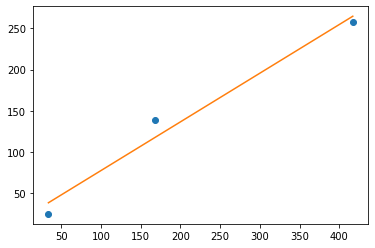

In [19]:
A_trend_100 = (np.max(trend_100) - np.min(trend_100)) / 2
A_trend_105 = (np.max(trend_105) - np.min(trend_105)) / 2
A_trend_106 = (np.max(trend_106) - np.min(trend_106)) / 2

x = np.array([np.mean(trend_100), np.mean(trend_105), np.mean(trend_106)])
y = np.array([A_trend_100, A_trend_105, A_trend_106])

m_trend, b_trend = np.polyfit(x,y, 1)
plt.plot(x,y,'o')
plt.plot(x,m_trend*x+b_trend)

In [20]:
def getX(start, end):
    ''' Return x axis array of the mock data (note, note datetime[ns])
        :params start: start date
        :type start: datetime

        :params end: end date
        :type end: dattime
    '''
    delta = end - start
    # generated cycle has start at 2020-10-01
    # depending on indicated start by user we need to shift the x range
    init = start - datetime.strptime('2020-10-01', '%Y-%m-%d')
    return np.arange(init.days, init.days + delta.days, 1)

In [34]:
def _getAmplitudeTrend(mean):
    '''Return the amplitude based on the linear regression from training data'''
    return m_trend * mean + b_trend
    
def mock_trend(mean, start, end):
    ''' Return mock consumption data based on the AQ(kWh)
    
        :params mean: list (of any length) containing mean 'Annual Quantity (kWh)'
        :type mean: list containing mean 'Annual Quantity (kWh)'

        :params start: start date
        :type start: datetime

        :params end: end date
        :type end: datetime
    '''
    x = getX(start, end)
    
    A = _getAmplitudeTrend(mean)
    A = np.array(A)[:, None]
    
    B = 2*np.pi / 365 # period is one year (365 days)
    
    v_shift = np.array(mean)[:, None] # up down
    
    # TODO this should also be a variable and not fixed to improve model
    h_shift = -0.4 # left right f 

    # TODO add some noise !?

    return A * np.sin(B*x + h_shift) + v_shift

In [55]:
# QUICK CHECK with known data 
# data = generateMeterList(5)
data = [[1000000603, 'SC1', 12337], [10588707, 'EM2', 75123], [10626610, 'NW1', 151779]]
data = pd.DataFrame(data, columns=['Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'])

start = datetime.strptime('2020-10-01', '%Y-%m-%d')
end = datetime.strptime('2022-10-01', '%Y-%m-%d')
mean = data['Annual Quantity (kWh)'] / 365

y = mock_trend(mean, start, end)
y = pd.DataFrame(y).T
y.columns = data['Meter ID']
px.line(y)

#### Step 3. Estimation for the Seasonal Amplitude

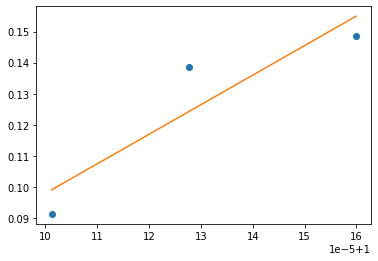

In [56]:
A_seasonal_100 = (np.max(seasonal_100) - np.min(seasonal_100)) / 2
A_seasonal_105 = (np.max(seasonal_105) - np.min(seasonal_105)) / 2
A_seasonal_106 = (np.max(seasonal_106) - np.min(seasonal_106)) / 2

x = np.array([np.mean(seasonal_106), np.mean(seasonal_100), np.mean(seasonal_105)])
y = np.array([A_seasonal_106,A_seasonal_100,A_seasonal_105])

m_seasonal, b_seasonal = np.polyfit(x,y, deg=1)
plt.plot(x,y,'o')
plt.plot(x,m_seasonal*x+b_seasonal)
# plt.plot(x,y, '--')

In [58]:
def _getAmplitudeSeasonal(mean):
    '''Return the amplitude based on the linear regression from training data'''
    return m_seasonal * mean + b_seasonal

def mock_seasonal(mean, start, end):
    x = getX(start, end)

    A = _getAmplitudeSeasonal(mean)
    A = np.array(A)[:, None] # convert into (2,1)

    B = 2*np.pi / 7 # period is one week (7 days)

    
    v_shift = mean - 0.05 # up down
    v_shift = np.array(v_shift)[:, None] # convert into (2,1)
    
    h_shift = -0.4 # left right

    y = - A * np.sin(B*x + h_shift) + v_shift
    return y

#### Step 4. Convert mean trend to mean seasonal

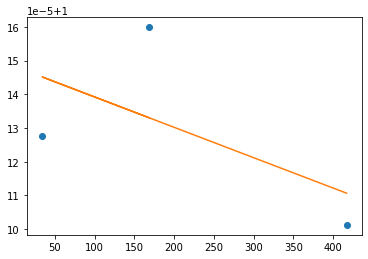

In [59]:
x_trend = np.array([np.mean(trend_106), np.mean(trend_100), np.mean(trend_105)])
y_seasonal = np.array([np.mean(seasonal_106), np.mean(seasonal_100), np.mean(seasonal_105)])

m_ts, b_ts = np.polyfit(x_trend, y_seasonal, 1)
plt.plot(x_trend, y_seasonal, 'o')
plt.plot(x_trend, m_ts * x_trend + b_ts)

In [60]:
def convertMeanTrendToMeanSeason(mean_trend):
    '''Return the amplitude based on the linear regression from training data'''
    return (m_ts * mean_trend + b_ts)

#### Step 5. Combine Trend and Seasonal to generate mock_data

In [64]:
def mock_data(meter_list, start, end):
    ''' Return mock consumption data based on the AQ(kWh)
    
        :params meter_list: list (of any length) containing 'Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'
        :type meter_list: list containing 'Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'

        :params start: start date
        :type start: string 'YYYY-mm-dd' i.e. 2020-10-01

        :params end: end date
        :type end: string 'YYYY-mm-dd' i.e. 2021-10-01

        :raises ValueError: if start > end
        :raises ValueError: if empty meter_list
    
    '''
    start = datetime.strptime(start, '%Y-%m-%d')
    end = datetime.strptime(end, '%Y-%m-%d')
    delta = end - start
    
    if delta.days < 0.:
        raise ValueError('start > end')
    if len(meter_list) <= 0.:
        raise ValueError('empty meter_list')

    # create a dataframe with meter_list
    df_temp_meter_list = pd.DataFrame(meter_list, columns=['Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'])
    mean = df_temp_meter_list['Annual Quantity (kWh)'] / 365
    
    t = mock_trend(mean, start, end)
    mean_s = convertMeanTrendToMeanSeason(mean)
    s = mock_seasonal(mean_s, start, end)
    return t * s

In [67]:
# CHECK with know data
# data = generateMeterList(15)
data = [[1000000603, 'SC1', 12337], [10588707, 'EM2', 75123], [10626610, 'NW1', 151779]]
y = mock_data(data, '2020-10-01', '2022-10-01')
data = pd.DataFrame(data, columns=['Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'])
y = pd.DataFrame(y).T
y.columns = data['Meter ID']
px.line(y)

## 4. Write a function that takes as an input a meter list and a consumption table and returns the Transportation cost table. Benchmark this function using meter lists of different sizes. Try longer periods as well? How does the function scale? 

In [89]:
START = '2020-10-01'
END = '2022-10-01'
# can be cleaner but needed to determine time index for X
x_time = np.arange(datetime.strptime(START, '%Y-%m-%d'), datetime.strptime(END, '%Y-%m-%d'), timedelta(days=1)).astype(datetime)


In [86]:
def _getLookupRates(df_meter_list):
    # we already have df_rates loaded from above, for now this works

    df_exit_zones = pd.merge(df_rates, df_meter_list, on="Exit Zone")
    min_range = (df_exit_zones['Annual Quantity (Min)'] <= df_exit_zones['Annual Quantity (kWh)'])
    max_range = (df_exit_zones['Annual Quantity (Max)'] > df_exit_zones['Annual Quantity (kWh)'])
    df_lookup_rates = df_exit_zones.loc[min_range & max_range]

    # add end date
    df_lookup_rates['Date_end'] = df_lookup_rates['Date'].shift(-1)
    
    return df_lookup_rates

In [87]:
def transportationCost(meter_list, consumption):

    # generate the lookup rates based on df_rates table
    # ! NOTE: we only have range between 2020-04-01 and 2024-04-01

    df_meter_list = pd.DataFrame(meter_list, columns=['Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'])
    df_lookup_rates = _getLookupRates(df_meter_list)

    consumption = pd.DataFrame(consumption).T
    consumption.columns = df_meter_list['Meter ID']
    consumption['Date'] = x_time


    # calculate consumption
    df_lookup_rates['consumption (kWh) over period'] = df_lookup_rates.apply(lambda x: consumption[x['Meter ID']].loc[
        (consumption['Date'] >= x['Date']) &
        (consumption['Date'] < x['Date_end'])
    ].sum(), axis=1)

    # calculate cost and transform to from p to £
    df_lookup_rates['cost over period (£)'] = df_lookup_rates['Rate (p/kWh)'] * df_lookup_rates['consumption (kWh) over period'] / 100

    df = df_lookup_rates.groupby('Meter ID')[['consumption (kWh) over period','cost over period (£)']].sum()
    df = df.rename(columns={'consumption (kWh) over period': 'Total Estimated Consumption (kWh)', 'cost over period (£)':'Total Cost (£)'})
    df = df.round(2)


    return df

    
    

In [90]:

# ! CHECK with known data
mock_meter_list = [[1000000603, 'SC1', 12337], [10588707, 'EM2', 75123], [10626610, 'NW1', 151779]]
mock_consumption = mock_data(mock_meter_list, START, END)
transportationCost(mock_meter_list, mock_consumption)

/Users/nielshellinga/Documents/Projecten/SimplonSolutions/gorilla.co/gorilla test/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total Estimated Consumption (kWh)  Total Cost (£)
Meter ID                                                     
10588707                            142751.00           33.28
10626610                            288409.92           83.84
1000000603                           23443.49            7.84

In [91]:
mock_meter_list = generateMeterList(15)
mock_consumption = mock_data(mock_meter_list, START, END)
transportationCost(mock_meter_list, mock_consumption)

/Users/nielshellinga/Documents/Projecten/SimplonSolutions/gorilla.co/gorilla test/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total Estimated Consumption (kWh)  \
Meter ID                                                                    
84803887745349105396620910479636874165                          857246.59   
84803905334001183565164968792404706229                          721808.56   
84803911672254184704207387875055158197                               0.00   
84803917218225560702372686501125473205                         1165241.43   
84803921021177361391126515554843804597                               0.00   
84803925141041812131090615291527480245                               0.00   
84803929260906262872755949787450360757                               0.00   
84803933063858063558192033290680189877                          788788.12   
84803937025266189271155304013861405621                         1635647.02   
84803940986674314982855033566588486581                         1842712.73   
84803944948082440697962017712398058421                           76076.34   
84803948117208941266810924271849882549                          699123.34   
84803952078617066979349730730151429045                          454914.92   
84803956040025192695571918733688619957                         1368366.33   
84803960001433318406769496927963890613                          503324.17   

                                        Total Cost (£)  
Meter ID                                                
84803887745349105396620910479636874165          257.06  
84803905334001183565164968792404706229          207.84  
84803911672254184704207387875055158197            0.00  
84803917218225560702372686501125473205          271.90  
84803921021177361391126515554843804597            0.00  
84803925141041812131090615291527480245            0.00  
84803929260906262872755949787450360757            0.00  
84803933063858063558192033290680189877          229.35  
84803937025266189271155304013861405621         4004.48  
84803940986674314982855033566588486581         4511.46  
84803944948082440697962017712398058421           22.31  
84803948117208941266810924271849882549          201.31  
84803952078617066979349730730151429045          132.26  
84803956040025192695571918733688619957          409.28  
84803960001433318406769496927963890613          147.34

#### Benchmark this function using meter lists of different sizes. Try longer periods as well? How does the function scale? 

In [102]:
# getting warnings for the .shift operation. 
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

In [104]:
import timeit

In [155]:
num_runs = 33

def func():
   mock_meter_list = generateMeterList(size)
   mock_consumption = mock_data(mock_meter_list, START, END)
   transportationCost(mock_meter_list, mock_consumption)

def benchmark():
   duration = timeit.Timer(func).timeit(number = num_runs)
   avg_duration = duration/num_runs
   print(f'{size}: On average it took {avg_duration} seconds')
   return avg_duration

In [153]:
sizes = [5,15,30,50,100,200,500,1000,5000,10000]
avg = []
for x in sizes:
    size = x
    avg.append(benchmark())


5: On average it took 0.10242387293979074 seconds
15: On average it took 0.22788257718132104 seconds
30: On average it took 0.5237539133337453 seconds
50: On average it took 0.5537970514542945 seconds
100: On average it took 0.7596620302118192 seconds
200: On average it took 1.8896406583027618 seconds
500: On average it took 3.726235660879562 seconds
1000: On average it took 7.879760707969333 seconds
5000: On average it took 40.219697050151424 seconds
10000: On average it took 95.66822943830365 seconds


In [173]:
a_duration = []
for s,a in avg:
    a_duration.append(a)

x = pd.DataFrame([sizes, a_duration]).T
x.columns = ['size', 'avg_duration']
x = x.set_index('size')
px.line(x)

The graph shows us a linear increase as the data increases.

#### 5. What are your observations after benchmarking? Are there any steps in the cost calculation that can be improved? How would you go about improving the performance of such a calculation?

Due to lack of time and spending maybe too much effort on the exploration part and mocking the data I did not get around testing various length of periods. Would be interesting to see what happens.

Steps to improve. We should further dive into the function to see what parts are slow by using helper functions like `cProfiling`. This module chould give us an idea about where to look for bottlenecks. 

I tried to avoid for loops and I think (!?) we managed to not use them. 

I would also need to read up on vectorizing vs numpy vs pandas build in funcitons like .sum() to get to know the performace of them

We are using the ``.apply(lambda: ...).sum()`` function. We might be able to rewrite this to use a vector operation.

we might also need to use the set_index of 'Date' for faster lookup. ``consumption['Date'] = x_time``